<a href="https://colab.research.google.com/github/Ryrung/CodeStates_Project_Section1/blob/main/n211-simple-regression/n211a-simple-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 1 / NOTE 1*

# 📝 Assignment
---

# Linear Regression

이번 모듈에서 사용한 데이터와 유사한 데이터를 사용해 복습해 보겠습니다. 이 데이터셋은 미국 시애틀 King County 지역에서 2014년 5월부터 ~ 2015년 5월 까지 주택 판매 가격 데이터입니다.

   - [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv)


이 데이터를 사용해 다음 과제를 마크다운과 코드를 사용해 진행해 주세요.


In [1]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')


In [2]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### 1) 특성들과 타겟(Price)과의 상관계수를 계산하고 가장 상관관계가 높은 특성을 찾아 타겟과의 관계를 시각화하세요.
- **(Urclass Quiz) 타겟과 상관관계가 가장 높은 특성의 이름을 제출하세요.**

In [3]:
# 상관계수 확인
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [5]:
# Price와의 상관계수 확인
df.corr().sort_values(by = 'price', ascending = False)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
grade,0.008130,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248
sqft_above,-0.010842,0.605567,0.477600,0.685342,0.876597,0.183512,0.523885,0.072075,0.167649,-0.158214,0.755923,1.000000,-0.051943,0.423898,0.023285,-0.261190,-0.000816,0.343803,0.731870,0.194050
sqft_living15,-0.002901,0.585379,0.391638,0.568634,0.756420,0.144608,0.279885,0.086463,0.280439,-0.092824,0.713202,0.731870,0.200355,0.326229,-0.002673,-0.279033,0.048858,0.334605,1.000000,0.183192
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
sqft_basement,-0.005151,0.323816,0.303093,0.283770,0.435043,0.015286,-0.245705,0.080588,0.276947,0.174105,0.168392,-0.051943,1.000000,-0.133124,0.071323,0.074845,0.110538,-0.144765,0.200355,0.017276
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
lat,-0.001891,0.307003,-0.008931,0.024573,0.052529,-0.085683,0.049614,-0.014274,0.006157,-0.014941,0.114084,-0.000816,0.110538,-0.148122,0.029398,0.267048,1.000000,-0.135512,0.048858,-0.086419


### 2) sqft_living 와 price의 scatter plot을 그리고 기준모델을 시각화해 보세요.
- **(Urclass Quiz) 기준모델의 값을 제출하세요. (소숫점 이하 반올림)**

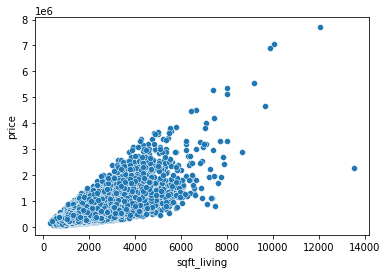

In [6]:
import seaborn as sns

sns.scatterplot(x = 'sqft_living', y = 'price', data = df)

In [9]:
# 일반적으로 선형회귀모델의 기준모델은 타겟데이터의 '평균값'으로 설정
baseline = df['price'].mean()
baseline.round(0)

540088.0

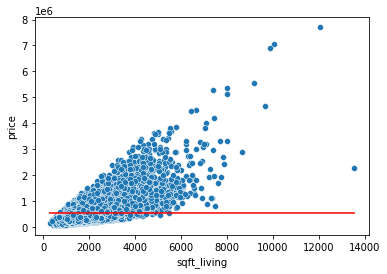

In [10]:
sns.scatterplot(x = 'sqft_living', y = 'price', data = df)
sns.lineplot(x = 'sqft_living', y = baseline, data = df, color ='red')

### 3) Scikit-Learn 라이브러리를 사용해 특성 sqft_living에 대한 선형회귀모델을 만들어 보세요.
- **(Urclass Quiz) sqft_living 값이 15000인 경우에 모델이 예측하는 주택 가격을 제출하세요.(소수점 이하 반올림)**

In [13]:
from sklearn.linear_model import LinearRegression

#1. scikit-learn 의 LinearRegression 라이브러리를 불러오기
# 2. 예측모델 인스턴스 만들기
# 3. X특성과 y타겟 벡터 만들기
# 4. 모델을 학습(fit)
# 5. 새로운 데이터 한 샘플을 학습한 모델에 넣어 예측
model = LinearRegression()

feature = ['sqft_living']
target = ['price']

x_train = df[feature]
y_train = df[target]

model.fit(x_train, y_train)

LinearRegression()

In [14]:
x_test = [[15000]]
y_predict = model.predict(x_test)
print(y_predict.round(0))

[[4165773.]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


### 4) 만든 모델을 사용해 새로운 데이터에 대해 예측을 해 보고 coefficient를 사용해 설명해 보세요.
- **(Urclass Quiz) sqft_living 특성에 대한 회귀계수를 제출하세요. (소수점 이하 반올림)**

In [15]:
model.coef_.round(0)

array([[281.]])

### 5) bathrooms 특성을 사용하여 모델을 만들어보고 비교해 보세요.
- **(Urclass Quiz) bathrooms에 대한 회귀계수를 제출하세요. (소수점 이하 반올림)**

In [16]:
model1 = LinearRegression()

feature1 = ['bathrooms']
target1 = ['price']

x_train_ = df[feature1]
y_train_ = df[target1]

model1.fit(x_train_, y_train_)

LinearRegression()

In [17]:
model1.coef_.round(0)

array([[250327.]])

## 🔥도전과제 (Github - Discussion) 

### 공지로 안내드리는 Github - Discussion 페이지에 올려보세요:)

### 6) 단순선형회귀모델을 만들기 위해 전제되어야 하는 조건들에 대해 찾아보시고 논해보세요.

### 7) OLS에 대해서 검색해 보고 본인의 이해를 녹여내어 본인의 언어로 설명해 보세요.

**6번 전제조건**
1. 두 변수 간의 선형관계가 있어야 한다
2. 데이터가 2개 이상일 것. 이는 직선을 그리기 위해 최소 2개의 점이 있어야 하기 때문이다.
3. Zero-conditional mean, 주어진 x값에서 오차의 평균은 0이 된다
4. Homoskedascitiy(등분산성); 모든 x에 잉여 오차들이 같은 정도로 퍼져 있어야 한다
5. Independence(독립성); 오차항들끼리는 독립이어야 하며 어떠한 관계를 가지면 안된다
6. Normality(정규성); 오차들끼리는 정규분포를 이룬다

**7번 OLS란**
- 관측치에 가장 적합한 회귀직선으로 예측값과 관측치의 벗어난 정도가 가장 적은 직선
- y의 실제값과 예측값의 잔차제곱합(차이제곱합)을 최소화하는 방법
- 최소자승법이라고도 한다
